#  Analysis of Iris DataSet with logistic regression, KNN and Decision Tree

In [6]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
#Reading the Csv File
path = "C:\\Users\\AYANMAN\\Desktop\\Python with anaconda\\crampete data science\\datas\\Iris.csv"
df = pd.read_csv(path)
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
#dropping the unwanted columns from the data
df = df.drop(columns = ['Id'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [26]:
#View the statistics of the data
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [27]:
#View the basic Info and datatype of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [32]:
#To display the numb of samples on each class
df['Species'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

# Preprocessing the Dataset

In [34]:
#Check for null values
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Exploratory Data  Analysis

<AxesSubplot:>

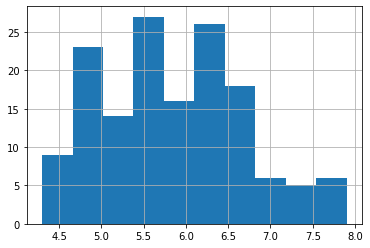

In [36]:
#Histograms
df['SepalLengthCm'].hist()

<AxesSubplot:>

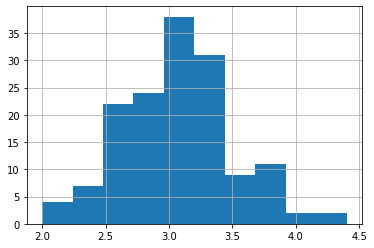

In [38]:
df['SepalWidthCm'].hist()

<AxesSubplot:>

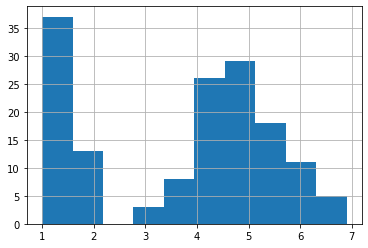

In [39]:
df['PetalLengthCm'].hist()

<AxesSubplot:>

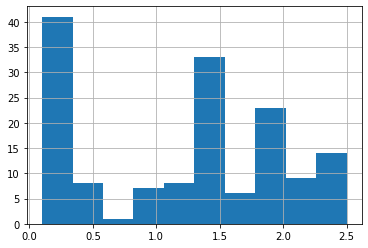

In [40]:
df['PetalWidthCm'].hist()

In [41]:
#Scatterplot
colors = ['red', 'orange', 'blue']
species = ['Iris-versicolor','Iris-virginica', 'Iris-setosa']

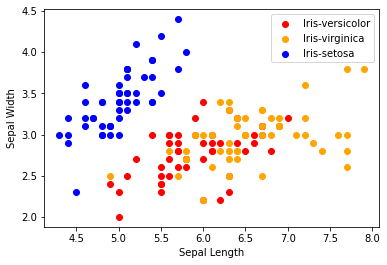

In [49]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c = colors[i], label=species[i])
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()

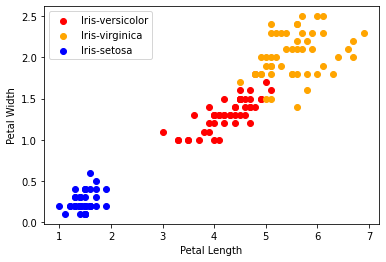

In [50]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c = colors[i], label=species[i])
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()

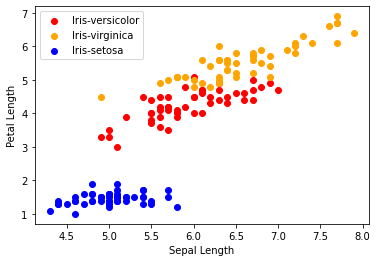

In [51]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['PetalLengthCm'], c = colors[i], label=species[i])
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.legend()

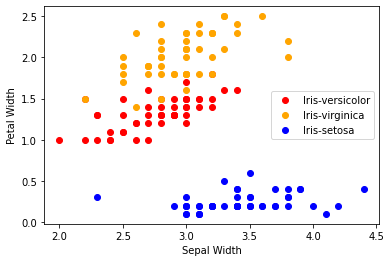

In [53]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalWidthCm'], x['PetalWidthCm'], c = colors[i], label=species[i])
plt.xlabel('Sepal Width')
plt.ylabel('Petal Width')
plt.legend()

# Correlation matrix
#A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. Brighter color or number close to 1 or 1 has higher correlation.

In [54]:
#Finding Correlation matrix

df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

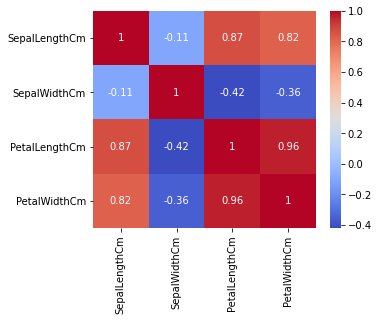

In [60]:
corr = df.corr()
fig, ax = plt.subplots(figsize = (5,4))
sns.heatmap(corr, annot = True, ax=ax, cmap = 'coolwarm')

# Label Encoder
#Encode target labels with value between 0 and n_classes-1

#LabelEncoder can be used to normalize labels. 

#Covert categorical data into numerical or machine-Readable form.


In [2]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [13]:
df['Species'] = le.fit_transform(df['Species'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Model Training

In [121]:
from sklearn.model_selection import train_test_split
X = df.drop(columns = ['Species'])
Y = df['Species']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25)

In [93]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [94]:
# Model Training
model.fit(x_train, y_train)

c:\users\ayanman\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [124]:
#Print Metrics to get performance
print('Accuracy :', model.score(x_test, y_test) * 100)

Accuracy : 100.0


In [101]:
#knn - k-nearest neighbors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [102]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [123]:
#Print Metrics to get performance
print('Accuracy :', knn.score(x_test, y_test) * 100)

Accuracy : 100.0


In [114]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()

In [115]:
tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [132]:
print('Accuracy :', tree.score(x_test, y_test) * 100)

Accuracy : 100.0
